# Classificatio of sms as 'Ham & Spam' using Logistic Regression, naive Bayes classifier, support vector machine (SVM) classifier

## Import relevant packages 

In [1]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('smsspamcollection.tsv',sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
print(df['label'].unique())
print(df['label'].value_counts())

['ham' 'spam']
ham     4825
spam     747
Name: label, dtype: int64


In [4]:
#check for missing values
df.isnull().sum()
#no missing values in the data

label      0
message    0
length     0
punct      0
dtype: int64

## Visualize the data

In [5]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

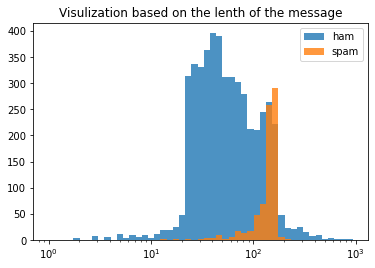

In [6]:
plt.xscale('log')
bins=1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.title('Visulization based on the lenth of the message')
plt.show()

This shows that there is a small range of values where the message is more likely yo be a spam.

In [7]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

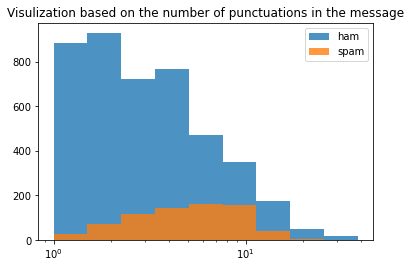

In [8]:
plt.xscale('log')
bins=1.5**(np.arange(0,10))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.title('Visulization based on the number of punctuations in the message')
plt.show()

No distinctive difference observed in the number of punctuations for the ham and spam messages

## split the data into train and test set 

In [9]:
#select the features
X=df[['length','punct']]
y=df['label']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)

X_train shape:  (3900, 2)
X_test shape:  (1672, 2)


## Logistic Regression 

In [11]:
model=LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)

LogisticRegression()

In [12]:
#prediction
predictions=model.predict(X_test)

In [13]:
#confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[1404   44]
 [ 219    5]]


In [14]:
df=pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=['ham','spam'],columns=['ham','spam'])
df

,ham,spam
ham,1404,44
spam,219,5


In [15]:
#classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [16]:
#accuracy score
print('The accuracy of the model is: ',(metrics.accuracy_score(y_test,predictions).round(4))*100,'%')
lg_acc=(metrics.accuracy_score(y_test,predictions).round(4))*100

The accuracy of the model is:  84.27 %


# support vector machine (SVM) classifier

In [17]:
svc_model = SVC(gamma='auto')
svc_model.fit(X_train,y_train)

SVC(gamma='auto')

In [18]:
#prediction
predictions=svc_model.predict(X_test)

In [19]:
#confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[1373   75]
 [ 121  103]]


In [20]:
df=pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=['ham','spam'],columns=['ham','spam'])
df

,ham,spam
ham,1373,75
spam,121,103


In [21]:
#classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

    accuracy                           0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672



In [22]:
#accuracy score
print('The accuracy of the model is: ',(metrics.accuracy_score(y_test,predictions).round(4))*100,'%')
svc_acc=(metrics.accuracy_score(y_test,predictions).round(4))*100

The accuracy of the model is:  88.28 %


# naive bayes classifier

In [23]:
nb_model=MultinomialNB()
nb_model.fit(X_train,y_train)

MultinomialNB()

In [24]:
#prediction
predictions=nb_model.predict(X_test)

In [25]:
#confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[1438   10]
 [ 224    0]]


In [26]:
df=pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=['ham','spam'],columns=['ham','spam'])
df

,ham,spam
ham,1438,10
spam,224,0


In [27]:
#classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [28]:
#accuracy score
print('The accuracy of the model is: ',(metrics.accuracy_score(y_test,predictions).round(4))*100,'%')
nb_acc=(metrics.accuracy_score(y_test,predictions).round(4))*100

The accuracy of the model is:  86.0 %


In [33]:
df=pd.DataFrame({'accuracy score':[lg_acc,svc_acc,nb_acc]},index=['Logistic Regression','Support Vector Machine','Naive Bayes'])
df

,accuracy score
Logistic Regression,84.27
Support Vector Machine,88.28
Naive Bayes,86.00


SVM gives us the most accuracy among the given models.